In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [20]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
data_summary=(train_images,train_labels,test_images,test_labels)

In [21]:
def data_summary(x_train,y_train,x_test,y_test):
 print("Train Image Shape",train_images.shape)
 print("Train labels Shape",train_labels.shape)
 print("Test Image Shape",test_images.shape)
 print("Test labels Shape",test_labels.shape)

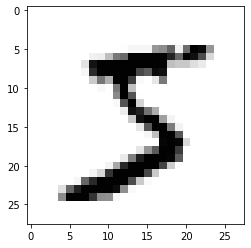

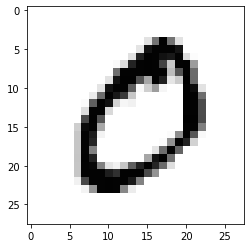

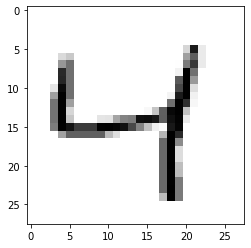

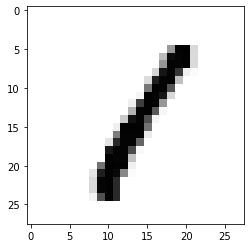

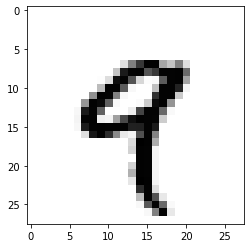

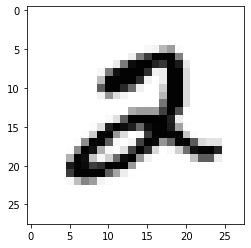

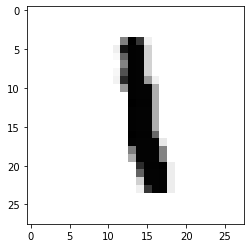

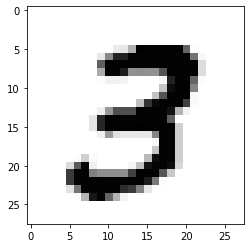

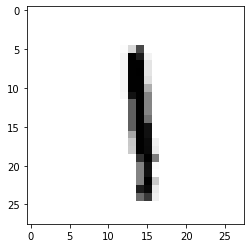

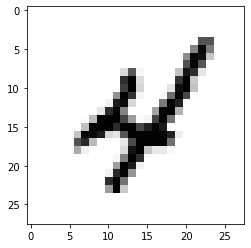

In [36]:
import matplotlib.pyplot as plt
for i in range(10):
    img = train_images[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [22]:
train_images=(train_images/255)
test_images=(test_images/255)

In [23]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'],)

In [25]:
history=model.fit(
train_images,
to_categorical(train_labels),
epochs=5,
batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6612 - accuracy: 0.8290
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3068 - accuracy: 0.9119
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9267
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2193 - accuracy: 0.9368
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1923 - accuracy: 0.9455


In [26]:
los,accurac=model.evaluate(
test_images,
to_categorical(test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.1773 - accuracy: 0.9476


In [33]:
predictions=model.predict(test_images[:10])

1/1 [==============================] - 0s 48ms/step


In [34]:
print(np.argmax(predictions,axis=1))
print(test_labels[:10])

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


In [31]:
print(predictions.round())

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


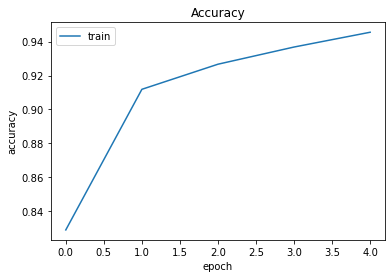

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

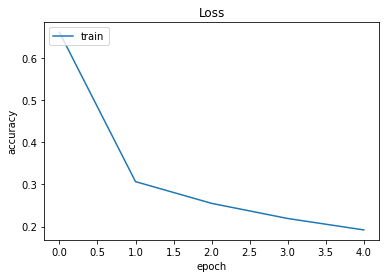

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [35]:
a=tf.keras.utils.to_categorical ([0,1,2,3,4,5])
a=tf.constant(a,shape=[6,6])
print(a)

tf.Tensor(
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]], shape=(6, 6), dtype=float32)
